In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [4]:
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
print(df.shape)
print(len(df))
print(len(df.columns))

(569, 33)
569
33


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.drop(columns=["Unnamed: 32"], inplace=True)
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [9]:
print(len(df.columns))

32


Number of Benign patients: 357
Number of Malignant patients: 212


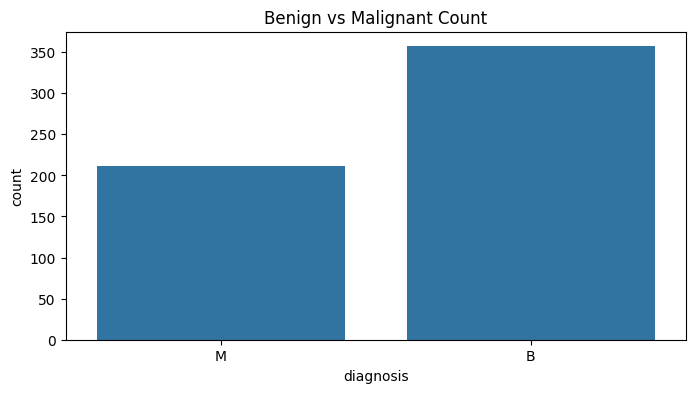

In [10]:
counts = df['diagnosis'].value_counts()
print("Number of Benign patients:", counts['B'])
print("Number of Malignant patients:", counts['M'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='diagnosis')
plt.title("Benign vs Malignant Count")
plt.show()


In [11]:
y = df['diagnosis']

selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

X = df[selected_features]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20, stratify=y)
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)


X_train: (455, 4)
X_test:  (114, 4)
y_train: (455,)
y_test:  (114,)


In [13]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [14]:
model = LogisticRegression(max_iter=1000)
params = {"C": [0.01, 0.1, 1, 10]}
grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_sc, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'C': 1}
0.9098901098901099


In [15]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8508771929824561


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.86      0.92      0.89        72
           M       0.84      0.74      0.78        42

    accuracy                           0.85       114
   macro avg       0.85      0.83      0.84       114
weighted avg       0.85      0.85      0.85       114



In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Benign','Malignant'], columns=['Benign','Malignant'])
print(cm_df)


           Benign  Malignant
Benign         66          6
Malignant      11         31


In [18]:
model = DecisionTreeClassifier()
params = {
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']}
grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_sc, y_train)
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best Score: 0.9010989010989011
Best Parameters: {'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4}


In [19]:
model = DecisionTreeClassifier()
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8508771929824561


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.89      0.88      0.88        72
           M       0.79      0.81      0.80        42

    accuracy                           0.85       114
   macro avg       0.84      0.84      0.84       114
weighted avg       0.85      0.85      0.85       114



In [21]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Benign','Malignant'], columns=['Benign','Malignant'])
print(cm_df)

           Benign  Malignant
Benign         63          9
Malignant       8         34


In [22]:
model = RandomForestClassifier()
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}
grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_sc, y_train)
print("Best Score:", grid.best_score_)
print("Best Model:", grid.best_estimator_)
print("Best Params:", grid.best_params_)


Best Score: 0.9076923076923077
Best Model: RandomForestClassifier(max_depth=10, n_estimators=200)
Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [24]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, bootstrap=True)
rf.fit(X_train_sc, y_train)
y_pred = rf.predict(X_test_sc)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8947368421052632


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.88      0.97      0.92        72
           M       0.94      0.76      0.84        42

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



In [27]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=['Actual Benign', 'Actual Malignant'],
    columns=['Pred Benign', 'Pred Malignant'])
print(cm)

                  Pred Benign  Pred Malignant
Actual Benign              70               2
Actual Malignant           10              32


In [28]:
svm = SVC()
params = {
    'C': [0.1, 1, 2],
    'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm, params, cv=5)
grid.fit(X_train_sc, y_train)
print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)


Best Score: 0.9164835164835164
Best Params: {'C': 0.1, 'kernel': 'rbf'}


In [29]:
svc = SVC(C=0.1, kernel='linear')
svc.fit(X_train_sc, y_train)
y_pred = svc.predict(X_test_sc)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8596491228070176


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.86      0.93      0.89        72
           M       0.86      0.74      0.79        42

    accuracy                           0.86       114
   macro avg       0.86      0.83      0.84       114
weighted avg       0.86      0.86      0.86       114



In [31]:
confusion_matrix(y_test,y_pred)
lr_cm = confusion_matrix(y_test, y_pred)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,67,5
Malignant,11,31


In [32]:
model = KNeighborsClassifier()
param = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance']}
grid = GridSearchCV(model, param, cv=5)
grid.fit(X_train_sc, y_train)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'n_neighbors': 6, 'weights': 'uniform'}
Best score: 0.9142857142857143


In [33]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8421052631578947


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.85      0.92      0.88        72
           M       0.83      0.71      0.77        42

    accuracy                           0.84       114
   macro avg       0.84      0.82      0.82       114
weighted avg       0.84      0.84      0.84       114



In [35]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Benign','Actual Malignant'], columns=['Pred Benign','Pred Malignant'])
print(cm_df)

                  Pred Benign  Pred Malignant
Actual Benign              66               6
Actual Malignant           12              30


In [36]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
params = {"C": [0.01, 0.1, 1, 10], "penalty": ['l2']}
grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_sc, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.9098901098901099


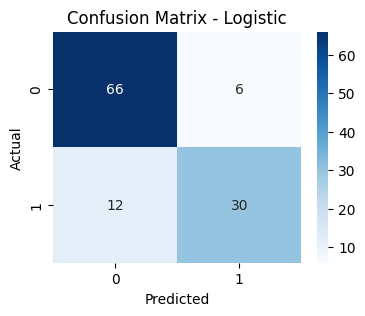

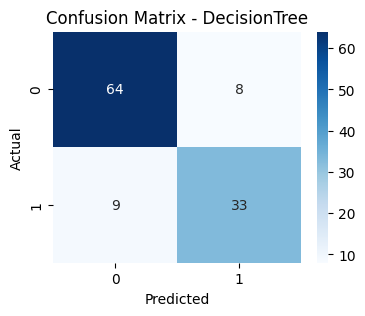

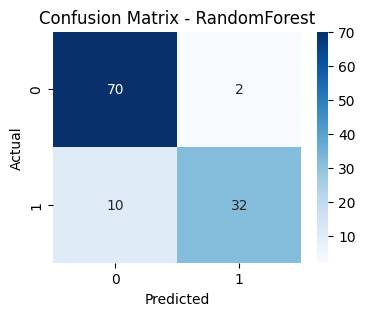

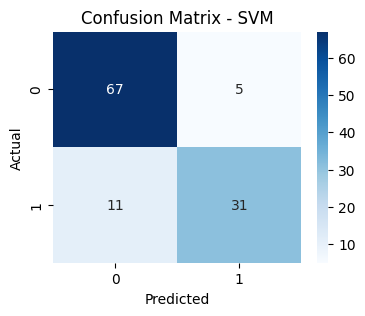

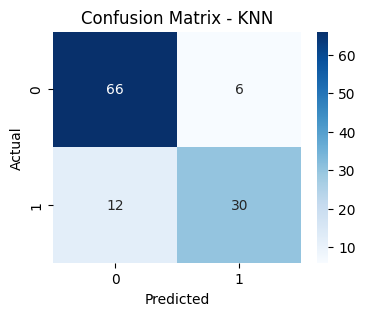

In [37]:
models = {
    "Logistic": y_pred,
    "DecisionTree": DecisionTreeClassifier().fit(X_train_sc, y_train).predict(X_test_sc),
    "RandomForest": rf.predict(X_test_sc),
    "SVM": svc.predict(X_test_sc),
    "KNN": knn.predict(X_test_sc)}
for name, pred in models.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


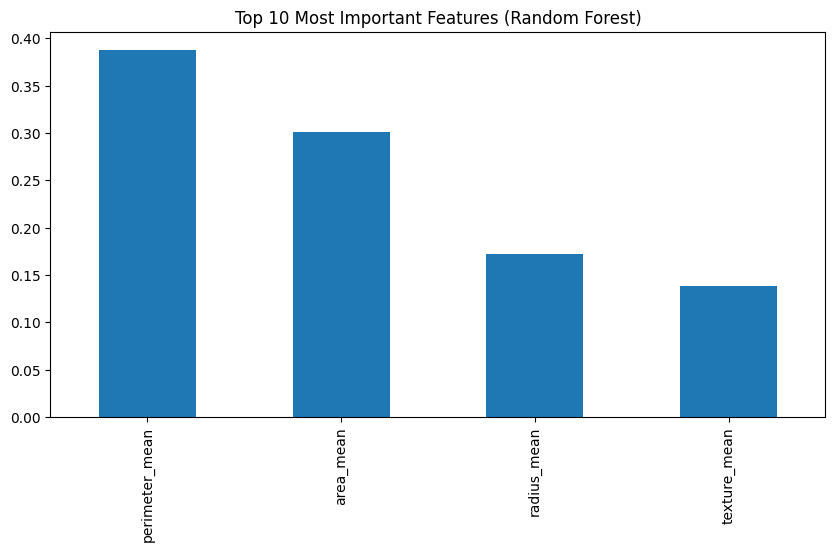

In [38]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
importances.nlargest(10).plot(kind='bar')
plt.title("Top 10 Most Important Features (Random Forest)")
plt.show()


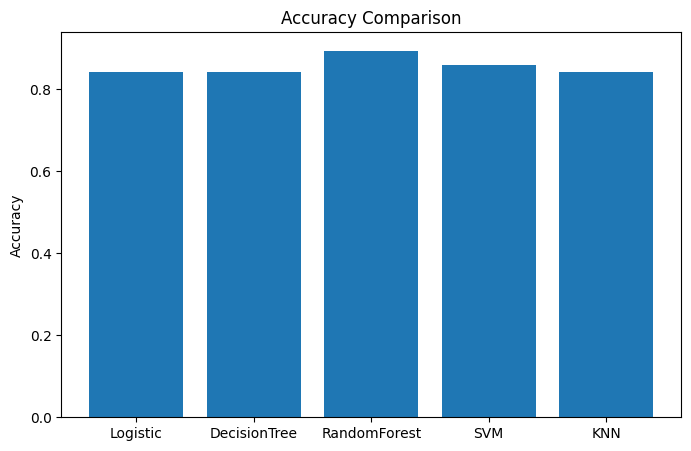

In [40]:
accuracies = {
    "Logistic": accuracy_score(y_test, y_pred),
    "DecisionTree": accuracy_score(y_test, DecisionTreeClassifier().fit(X_train_sc, y_train).predict(X_test_sc)),
    "RandomForest": accuracy_score(y_test, rf.predict(X_test_sc)),
    "SVM": accuracy_score(y_test, svc.predict(X_test_sc)),
    "KNN": accuracy_score(y_test, knn.predict(X_test_sc))
}

plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [41]:
import pickle
with open("breast_cancer_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [43]:
import pickle
with open("breast_cancer_model.pkl", "wb") as f:
    pickle.dump(model, f)
